In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
figpath="../../figures/supplementary/"
!mkdir $figpath

mkdir: ../../figures/supplementary/: File exists


In [24]:
def return_disc_rad(lmax):
    return min(180.,180.*(24./lmax))

def return_area(discsize):
    def integrand(x):
        return sin(x)
    return 2.*pi*quad(integrand,0.,discsize*pi/180.)[0]

list_nside=[4,8,16,32,64,128,256,512,1024,2048,4096,8192]

lmax=[] ; tot_pix=[]
odisc=[] 
disc_area_1b=[] ; disc_area_2b=[] ; disc_area_3b=[]

for i in list_nside:
    lmax=append(lmax,3*i)
    tot_pix=append(tot_pix,h.nside2npix(i))
    odisc=append(odisc,return_disc_rad(3*i))
    disc_area_1b=append(disc_area_1b,return_area(min(180.,return_disc_rad(3*i))))
    disc_area_2b=append(disc_area_2b,return_area(min(180.,2.*return_disc_rad(3*i))))
    disc_area_3b=append(disc_area_3b,return_area(min(180.,3.*return_disc_rad(3*i))))

In [26]:
disc_pix_1b=ceil(disc_area_1b*tot_pix/(4.*pi)).astype(int)
pix_frac_1b=(disc_area_1b/(4.*pi))

disc_pix_2b=ceil(disc_area_2b*tot_pix/(4.*pi)).astype(int)
pix_frac_2b=(disc_area_2b/(4.*pi))

disc_pix_3b=ceil(disc_area_3b*tot_pix/(4.*pi)).astype(int)
pix_frac_3b=(disc_area_3b/(4.*pi))

<IPython.core.display.Javascript object>


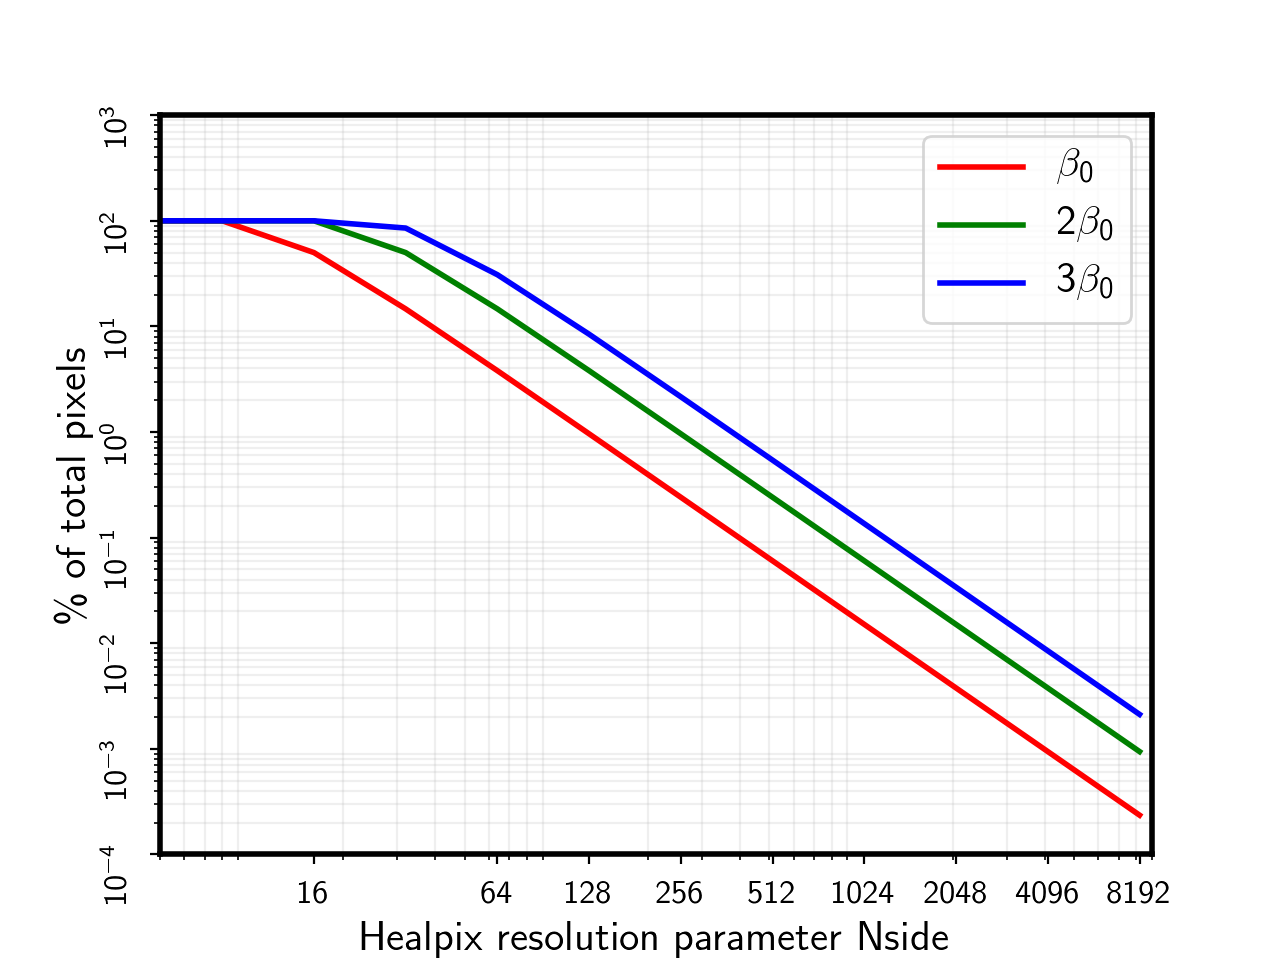

In [59]:
figure()
#plot(list_nside,disc_pix_1b*100./tot_pix,lw=2)
plot(list_nside,pix_frac_1b*100.,"r-",label=r"$\beta_0$",markersize=10)
plot(list_nside,pix_frac_2b*100.,"g-",label=r"2$\beta_0$",markersize=10)
plot(list_nside,pix_frac_3b*100.,"b-",label=r"3$\beta_0$",markersize=10)
ylim(1e-4,1000)
xlim(5,9000)
loglog()
legend(loc=0)
#hlines(0.1,1,9000)
ylabel("\% of total pixels")
xlabel("Healpix resolution parameter Nside")
xticks([16,64,128,256,512,1024,2048,4096,8192],[16,64,128,256,512,1024,2048,4096,8192],fontsize="12")
yticks(fontsize=12,rotation=90)
grid(which=u"minor",ls="solid",alpha=0.2)
savefig(figpath + "percent_of_total_pixels.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


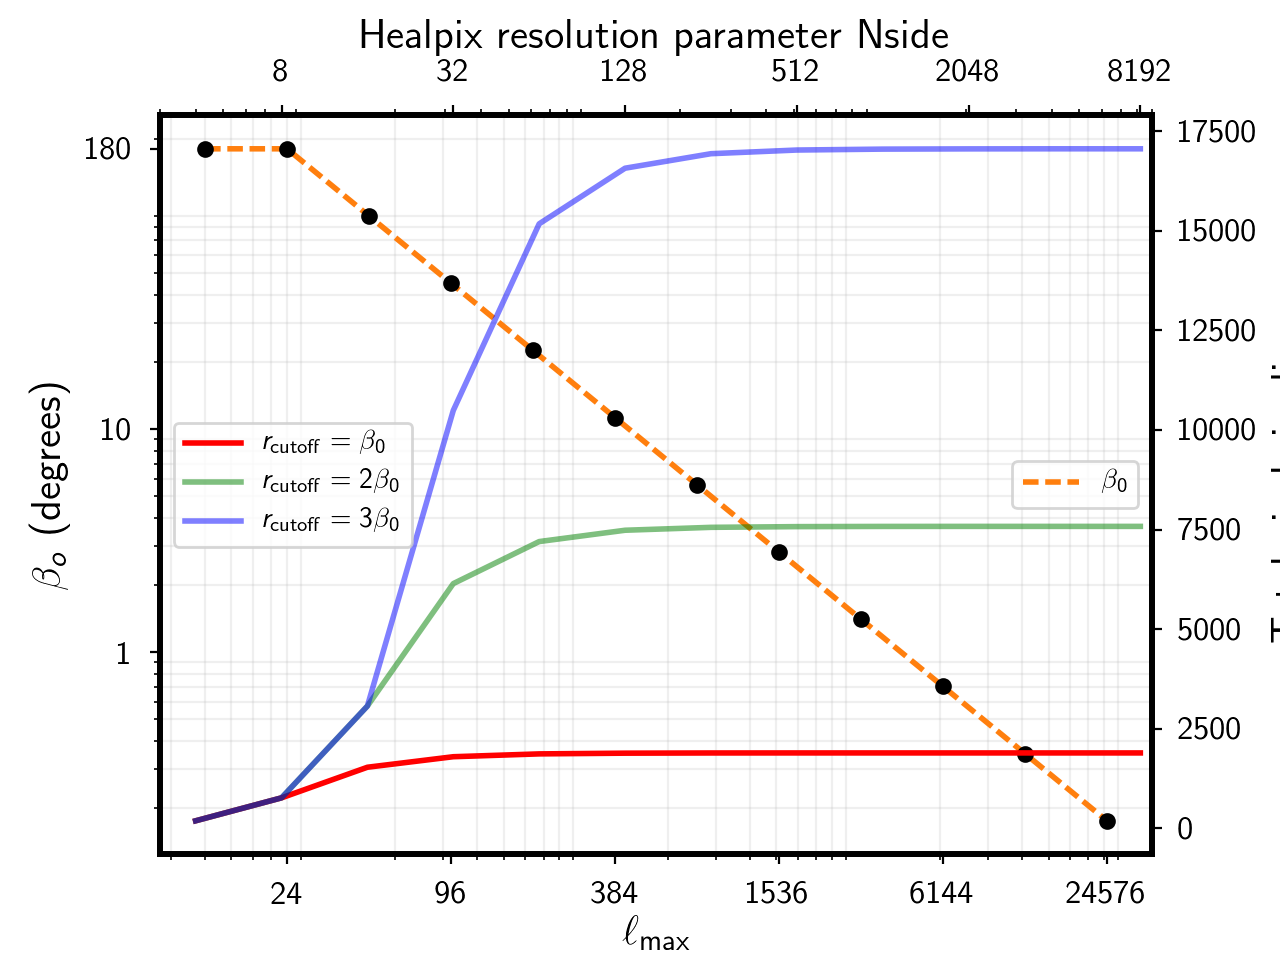

In [57]:
figure()
plot(list_nside,odisc,"--",color="#ff7f0e",lw=2,label=r"$\beta_0$")
plot(list_nside,odisc,"k.",markersize=10)
ylabel(r"$\beta_o$  (degrees)")#,color="#ff7f0e")
semilogy()
legend(loc="center right",fontsize=10)
grid(which=u"minor",ls="solid",alpha=0.2)
yticks([0.1,1,10,180],[0.1,1,10,180],fontsize=12)
ylim(0.1,200)
semilogx()
xticks([8,32,128,512,2048,8192],[3*8,3*32,3*128,3*512,3*2048,3*8192],fontsize=12)
xlabel(r"$\ell_{\rm max}$")
twiny()
semilogx()
xlabel("Healpix resolution parameter Nside")
xticks([8,32,128,512,2048,8192],[8,32,128,512,2048,8192],fontsize=12)


twinx()
plot(list_nside,disc_pix_1b,"r-",lw=2,label=r"$r_{\rm cutoff} = \beta_0$")
plot(list_nside,disc_pix_2b,"g-",lw=2,label=r"$r_{\rm cutoff} = 2 \beta_0$",markersize=10,alpha=0.5)
plot(list_nside,disc_pix_3b,"b-",lw=2,label=r"$r_{\rm cutoff} = 3 \beta_0$",markersize=10,alpha=0.5)
yticks(fontsize=12)
ylabel("Total pixels in disc")#,color="#1f77b4")
#semilogx()
#ylim(200,9000)
xlim(3,9000)
legend(loc="center left",ncol=1,fontsize=10)

savefig(figpath + "number_of_disc_pixels.pdf",dpi=300,bbox_inches="tight")